# Exercise 1: Model of a neuron and the learning process

## 1.1 Model of a neuron

Write a Python function, which calculates the output of a neuron. Assume a model of a neuron shown in Figure 1 with three inputs and a threshold. The threshold can be interpreted as an additional input with fixed input of $-1$ and weight $w_{10}$. The output of the function has to correspond to output of the neuron.

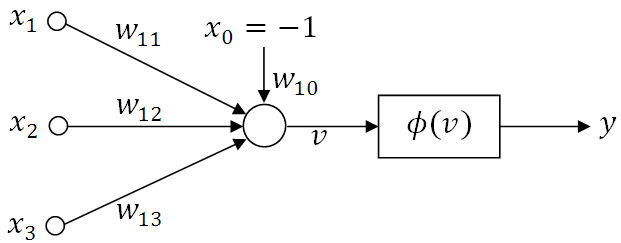

Figure 1. Model of a neuron

Use the scalar product of input vector $[x_0 x_1 x_2 x_3]$ and weights $[x_0 x_1 x_2 x_3]$ in order to calculate the neuron activation. The function has to have an additional input, which is used to select different nonlinear activation functions. The function should support the following nonlinear functions:

1. Step function
2. Piecewise linear function (ramp)
3. Sigmoid function defined as $\phi = \frac{1}{1+\exp (-av)}$, with $a=1$

**Tasks**

1. Write the code for calculating the aforementioned nonlinear functions and for the function which calculates the output of a neuron.

In [146]:
import numpy as np

def step_function(x):
    if x >= 0:
        return 1
    else:
        return 0

def ramp_function(x):
    if x >= 0:
        return x
    else:
        return 0

def sigmoid_function(x, a=1):
    return 1 / (1 + np.exp(-a * x))

def neuron(x, w, activation):
    return activation(np.dot(x, w))

**Tasks**

1. Pick a random weight vector $\mathbf{w}$. Write down the chosen weights and print the neuron response for following inputs (for each activation function):

$x_1 = [0.5, 1, 0.7]^T$

$x_2 = [0, 0.8, 0.2]^T$


In [147]:
w = np.array([2, 2, 2])
x1 = np.array([0.5, 1, 0.7])
x2 = np.array([0, 0.8, 0.2])

print(neuron(x1, w, step_function))
print(neuron(x1, w, ramp_function))
print(neuron(x1, w, sigmoid_function))

print(neuron(x2, w, step_function))
print(neuron(x2, w, ramp_function))
print(neuron(x2, w, sigmoid_function))


1
4.4
0.9878715650157257
1
2.0
0.8807970779778823


## 1.2 Three neuron network

Write a function for a three neuron network (Figure 2) using the function developed in section 1.1.. Assume that neurons use the sigmoid transfer function, where $a=1$ and assume the weights are given as follows:

$w_1=[1, 0.5, 1, -0.4]$

$w_2=[0.5, 0.6, -1.5, -0.7]$

$w_3=[-0.5, -1.5, 0.6]$

*Remark*: The first element of the weight vector is the threshold of a neuron and is shown as $w_{i0}$ in Figure 2.

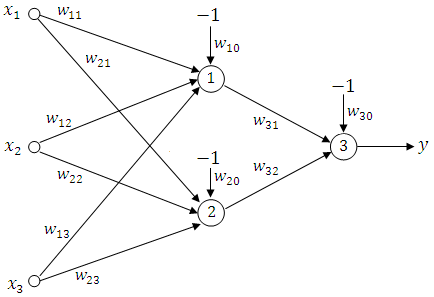

Figure 2. Three neuron network



**Tasks**

1. Write the code for calculating the output of the network shown in Fig. 2.

In [148]:
def three_neuron_network(x):
    inputRow = np.array([1] + x)
    w1 = np.array([1, 0.5, 1, -0.4])
    w2 = np.array([0.5, 0.6, -1.5, -0.7])
    w3 = np.array([-0.5, -1.5, 0.6])
    layerOne = np.vstack([w1, w2])
    o1 = np.hstack(([1], inputRow@layerOne.T))
    y = o1@w3
    return y

**Tasks**

1. Print the output of the network for input given as $x=[0.3, 0.7, 0.9]^T$.
2. Does the output of the network depend on neuron weights?

In [149]:
#1
x = [0.3, 0.7, 0.9]
y = three_neuron_network(x)
print(y)

-3.335


#2
Yes. Neuron output depends on neuron weights and bias

## 1.3 Delta rule

The goal of this experiment is to better understand the learning process. In this experiment we will implement a logical AND function using one neuron with two inputs and a threshold (see Figure 3). We will use the sigmoid nonlinear activation function with $a=1$.

For the learning phase, we have to define the following input output pairs $x_i$, $y_i$ for the logical AND function: for inputs $x_1=[-1, 0, 0]^T$, $x_2=[-1, 0, 1]^T$, and $x_3=[-1, 1, 0]^T$ the output $y$ should be equal to $0$; for input vector $x_4=[-1, 1, 1]^T$ the output value $y$ should be equal to $1$. The first component of all input vectors has value $-1$ and defines the neuron threshold visible as $w_{10}$ in Fig. 3. At the beginning we set the neuron weights to random values. We use the delta rule in order to update the weights:

$$\Delta w_{kj}=\eta e_{k}(n)x_{j}(n)$$

where

$$e_{k}(n)=d_{k}(n)-y_{k}(n)$$

where $d_{k}(n)$ is the expected neuron output and $y_{k}(n)$ is the obtained neuron output. This iterative procedure is repeated until the error is sufficiently small.

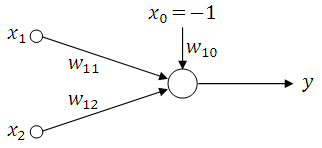

Figure 3. One neuron network

**Tasks**

1. Write the code which iteratively calculates the output of the network and uses the delta rule to update the weights until the error is sufficiently small. Experiment with different starting weights and different learning rates. (In case of instabilities, perform the experiment using a small learning rate, for example $\eta =0.05$). Show the error function ($y$-axis) and number of iterations ($x$-axis) for different learning rates.

    - What is the best learning rate? How does the learning rate affect the neural network?
    - How did you define the sufficiently small error used to terminate the algorithm?
    - After how many iterations does the algorithm terminate?


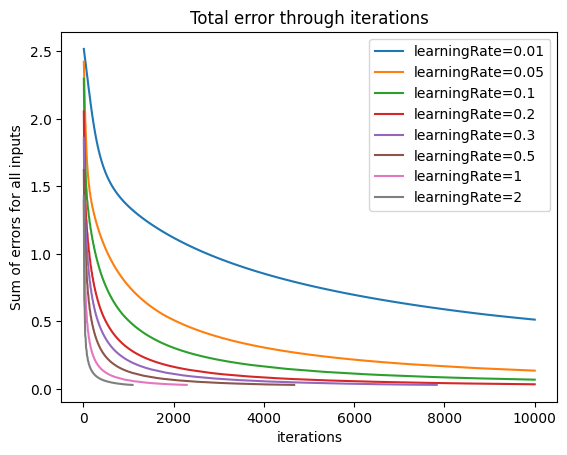

In [150]:
import matplotlib.pyplot as plt

x1 = [-1.0, 0, 0]
x2 = [-1.0, 0, 1]
x3 = [-1.0, 1, 0]
x4 = [-1.0, 1, 1]
y = [0, 0, 0, 1]

inputs = np.vstack((x1, x2, x3, x4))
w10 = [-1, 1, 1]
learningRates = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2]
plt.figure()

for learningRate in learningRates:
    N = 0
    index = 0
    iterations = 0
    xAxis = []
    yAxis = []
    w = w10.copy()

    while (N != inputs.shape[0] and iterations < 10000):
        iterations += 1
        output = neuron(inputs[index], w, sigmoid_function)
        error = output - y[index]
        if (iterations % 10 == 0):
            xAxis.append(iterations)
            sumError = 0
            for j in range (0, inputs.shape[0]):
                sumError += abs(neuron(inputs[j], w, sigmoid_function) - y[j]) 
            yAxis.append(sumError)

        if (abs(error) < 0.01):
            N += 1
        else:
            deltaWeight = learningRate * error * inputs[index]
            w = w - deltaWeight
            N = 0

        index = (index + 1) % 4


    # Create a plot
    plt.plot(xAxis, yAxis, label=f'learningRate={learningRate}' )  

# Add title and labels
plt.title('Total error through iterations')
plt.xlabel('iterations')
plt.ylabel('Sum of errors for all inputs')


# Display the plot
plt.legend()
plt.show()

# Exercise 2: Associative memory

## 2.1 Forming the correlation matrix directly

In this part of the exercise we will use the direct approach in forming the correlation matrix. Memory based on the correlation matrix should memorize input-output association pairs represented as vectors. For each input vector (key) the memory has to memorize the output pattern i.e. vector in an ASCII code formulation. In this example we will use 4-dimensional input and output vectors. Words (output vectos) that have to be memorized are: '*vrat*' , '*kraj*' , '*cres*' , '*otac*'. Vectors $b_i$, which represent those words should be formed as follows:

In [151]:
real=lambda x: np.array([[ord(character) for character in x]]).T

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

print(b1.T)
print(b2.T)
print(b3.T)
print(b4.T)

[[118 114  97 116]]
[[107 114  97 106]]
[[ 99 114 101 115]]
[[111 116  97  99]]


### 2.1.1 Orthogonal input vectors

This experiment demonstrates how to create an associative memory. Ortonormalized set of vectors defined as below

In [152]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

keys = np.hstack([a1, a2, a3, a4])
print(keys)

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


is used as input vector set (set of keys). We form the memory correlation matrix $\mathbf{M}$ using input output pairs as follows:

In [153]:
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]


In order to verify whether the memory is functioning properly, we have to calculate outputs for each input vector. For example, the output for the key $a_1$ can be obtained as follows:

In [154]:
char=lambda x:"".join(map(chr, map(int, list(x))))

word=char(M@a1)
print(word)

vrat


**Tasks**

For each key, print the key and the corresponding output.
1. Were all input-output pairs memorized correctly?
2. How many input-output pairs would be memorized if vectors $a_i$ were not normalized?

In [155]:
for i in range (0, keys.shape[0]):
    print(char(M@keys[i]))

# Creating non-normalized versions of the ai vectors
a1_prime = a1 * 2
a2_prime = a2 * 3
a3_prime = a3 * 4
a4_prime = a4 * 5

# Using the ai' vectors and bi vectors to form the correlation matrix M'
M_prime = b1 @ a1_prime.T + b2 @ a2_prime.T + b3 @ a3_prime.T + b4 @ a4_prime.T


print("Outputs using normalized ai vectors:\n", M)
print("Outputs using non-normalized ai vectors:\n", M_prime)

vrat
kraj
cres
otac
Outputs using normalized ai vectors:
 [[118 107  99 111]
 [114 114 114 116]
 [ 97  97 101  97]
 [116 106 115  99]]
Outputs using non-normalized ai vectors:
 [[236 321 396 555]
 [228 342 456 580]
 [194 291 404 485]
 [232 318 460 495]]


1. Yes, all input-output pairs are memorized correctly
2. If $a_i$ vectors are not normalized, it can influence the associative memory's performance:
    - Scale of entries in matrix M can be different. Higher magnitude vectors will dominate the matrix
    - When querying the memory, the result can be biased towards those vecotrs of higher magnitudes. Ambiguous recall results
    - Non-normalized vectors can increase sensitivity to noise
    - Higher possibility of overlap between different memory items. Overlap can make it harder to recall a specific memory item


### 2.1.2 Correlation matrix properties

The goal of this experiment is to demonstrate the capacity of obtained memory. In this part of the exercise we will try to memorize one more (fifth) word ('*mrak*'). In 4-dimensional vector space the maximum number of linearly independent vectors is four. Because of this fact, we pick an arbitrary unit vector as the fifth key, for example:

In [156]:
a5 = (a1 + a3) / np.sqrt(2)

Form vectors $b_5$ ('*mrak*') and $a_5$ as explained and add them into the memory using the following expression:

In [157]:
b5 = real("mrak")
M_five = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T + b5 * a5.T

**Tasks**

Once again, print each key and the corresponding output.
1. Was the new association properly memorized?
2. Did other associations stay correctly memorized?
    - If not - which were not memorized correctly and why?
    - If yes - which were memorized correctly and why?

In [158]:
for i in range (0, 4):
    print(char(M_five@keys[i]))

ÃÂ¥¿
kraj
°Â©¾
otac


1. Association wasn't properly memorized.
2. Associations that were properly memorized are the ones than that have key which is not linear combination of $a_5$ key: $a_2$ and $a_4$. $a_5$ is linear combination of  $a_1$ and $a_3$ so those memorized patterns suffered from interference. 
Associative memory can suffer from interference when stored paterns are not ortogonal. 

### 2.1.3 Word pairs as associations

In this experiment we will form the associative memory, which memorizes word pairs. The associations, which have to be memorized are: *ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*. Generate input vectors (keys) as follows:

In [159]:
a1 = real("ruka")
a2 = real("kset")
a3 = real("more")
a4 = real("mama")
M = b1 * a1.T + b2 * a2.T + b3 * a3.T + b4 * a4.T
print(M)

[[47791 47867 46818 44624]
 [50264 50354 49352 47048]
 [43019 43124 42263 40271]
 [47892 48130 47019 44766]]


**Tasks**

1. What is the response for each input key?
2. Which associations were memorized correctly?
3. Which associations were not memorized correctly and why?
4. How can we fix this problem?

In [160]:
for i in range (0, 4):
    print(char(M@keys[i]))

몯쑘ꠋ묔
뫻쒲꡴밂
뛢새ꔗ랫
깐럈鵏껞


1. ruka -> 몯쑘ꠋ묔 ... and so on. Everything is wrong.
2. None of the associations are correct
3. All of them. Dimensionality of the vectors and matrix isn't high enough to represent and distinguish each word-pair without interference
4. Increase dimensionality, orthogonal vectors, regularization, different model of associative memory.  

### 2.1.4 Input vector orthogonalization

In this experiment we show an associative memory, which uses keys that are orthonormalized. We use the Gram-Schmidt orthogonalization method as follows. We first form the matrix $\mathbf{A}$ using vectors $a_i$:

In [161]:
A=np.hstack([a1, a2, a3, a4])


[[114 107 109 109]
 [117 115 111  97]
 [107 101 114 109]
 [ 97 116 101  97]]


After this step we perform the orthonormalization step:

In [163]:
from scipy.linalg import orth
C=orth(A.T)

We extract individual orthonormal vectors $c_i$:

In [168]:
c1=np.array([C[0]]).T
c2=np.array([C[1]]).T
c3=np.array([C[2]]).T
c4=np.array([C[3]]).T

newKeys = np.hstack([c1, c2, c3, c4])

print(newKeys)

[[-0.50594743 -0.50939047 -0.50546797 -0.47858195]
 [ 0.14847022 -0.83525837  0.25257838  0.46530012]
 [ 0.77925491 -0.19795538 -0.01775974 -0.59435684]
 [ 0.33872641  0.06065043 -0.8248581   0.44854773]]


In the next step we form a new matrix $\mathbf{M}$ using vectors $c_i$ instead of vectors $a_i$ when creating the matrix $\mathbf{M}$.

In [170]:
M = b1 * c1.T + b2 * c2.T + b3 * c3.T + b4 * c4.T

**Tasks**

Verify the responses of matrix $\mathbf{M}$ with vectors $c_i$ as inputs.
1. What is the effect of vector orthonormalization?
2. How many pairs were correctly memorized?
3. What can we expect when normalizing the vectors?
4. What can we expect when only orthogonalizing the vectors?
5. What can we expect if vectors $c_i$ are linearly independent but not orthogonal?

In [176]:
for i in range (0, 4):
    print(char((M@newKeys[i])//1))

crcj


ValueError: chr() arg not in range(0x110000)

### 2.1.5 Finding the correlation matrix using matrix inversion

For previously used word pairs (*ruka*-*vrat*, *kset*-*kraj*, *more*-*cres*, *mama*-*otac*) find a $4\times 4$ correlation matrix $\mathbf{M}$ as $\mathbf{M} = \mathbf{B}\mathbf{A}^{-1}$, where matrix $\mathbf{B}$ is defined as:

In [ ]:
B=np.hstack([b1, b2, b3, b4])
M=B@np.linalg.inv(A)

**Tasks**

1. Were all associations properly memorized? Remark: The result should be rounded to the nearest number before comparison.

In [ ]:
# Write your code here

### 2.1.6 Finding the correlation matrix using pseudo-inversion

A pseudo-inverse matrix can be used in order to find the correlation matrix when number of associations is larger than dimensionality of vectors representing the associations. In this case, the correlation matrix can be found as $\mathbf{M} = \mathbf{B}\mathbf{A}^{+}$, where $\mathbf{A}^{+}$ is a pseudo-inverse matrix defined as $\mathbf{A}^{+} = \mathbf{A}^{T}(\mathbf{A}\mathbf{A}^{T})^{-1}$.

Assume that the vectors $a_i$ and $b_i$ are defined previously (five associations in total). Find the pseudo-inverse matrix for this case.

In [ ]:
a1 = np.array([[1, 0, 0, 0]]).T
a2 = np.array([[0, 1, 0, 0]]).T
a3 = np.array([[0, 0, 1, 0]]).T
a4 = np.array([[0, 0, 0, 1]]).T

a5 = (a1 + a3) / np.sqrt(2)

A=np.hstack([a1, a2, a3, a4, a5])
B=np.hstack([b1, b2, b3, b4, b5])
A_pseudo=A.T@np.linalg.inv(A@A.T)
M=B@A_pseudo

**Tasks**

1. Were all pairs memorized correctly?
2. If not, what is the error between expected and obtained values?

In [ ]:
# Write your code here

## 2.2 Finding the correlation matrix using supervised learning

This experiment shows us how to form the matrix $\mathbf{M}$ using supervised learning. In two following experiments we will use learning with error correction.

### 2.2.1 Learning with error correction

Form matrices $\mathbf{A}$ and $\mathbf{B}$ where each contains 4 vectors stacked in columns as explained in previous experiments. Check the contents of obtained matrices with following operations:

In [ ]:
a1=real("ruka")
a2=real("kset")
a3=real("more")
a4=real("mama")

b1=real("vrat")
b2=real("kraj")
b3=real("cres")
b4=real("otac")

A=np.hstack([a1, a2, a3, a4])
B=np.hstack([b1, b2, b3, b4])

In order to start the learning procedure we have to initialize the matrix $\mathbf{M}$ (For example, random values uniformly generated in $[-0.5, 0.5]$ interval):

In [ ]:
M=np.random.rand(4, 4)-0.5

For the learning part use the function *trainlms*, which is the implementation of the Widrow-Hoff LMS learning algorithm. The function can be used as follows:

In [ ]:
def trainlms(A, B, M, ni, max_num_iter, min_err=0.02):
    d=B
    x=A
    w=M

    n=0
    err=[]
    while (n<max_num_iter):
        n+=1
        e=d-w@x
        w+=ni*np.dot(e, x.T)
        err.append(np.sum(np.sum(np.multiply(e, e))))
        if (err[-1]<min_err):
            break
    return w, err

where *max_num_iter* is the number of iterations and *ni* is the learning rate. Find the *max_num_iter* variable experimentally. For *ni* you can use:

In [ ]:
ni=0.9999/np.linalg.eig(A @ A.T)[0].max()

The function trainlms performs the learning until SSE drops below $0.02$ or maximum number of iterations is performed. After the learning phase, look at the responses of the correlation matrix $\mathbf{M}$:

In [ ]:
M, e=trainlms(A, B, M, ni, 100000)

If we type

In [ ]:
np.round(M@A)==B

we will see, which characters were properly reconstructed: the positions with correct reconstructions will have value *True* and  other positions will have value *False*. By calling the *trainlms* multiple times we can extend the learning process and maybe increase the number of memorized characters but the proper way to extend the learning process is to increase the *max_num_iter* variable. We can draw a graph, which plots the error with number of iterations (in logaritmic scale) using the following commands:

In [ ]:
plt.plot(e)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.show()

**Tasks**

1. Plot a graph showing number of memorized characters tied to number of used iterations. (Caution: When building the graph, start the simulation with the same starting matrix.)

In [ ]:
# Write your code here

## 2.2.2 Effect of larger number of associations

This experiment demonstrates the capacity of the associative memory. What is the capacity of a $4\times 4$ correlation matrix based associative memory?

**Tasks**
1. For additional pair '*auto*'-'*mrak*' create vectors $a_5$ and $b_5$ as explained in the previous part of the exercise. Create new matrices A and B with dimensions $4$ (rows) $\times$ $5$ (columns) in the same way as previously explained. Initialize the matrix $\mathbf{M}$ with random starting values.

In [ ]:
# Write your code here

Use the *trainlms* function in the following way:

In [ ]:
ni=0.9999/max(np.linalg.eig(np.dot(A, A.T))[0])
M, e=trainlms(A, B, M, ni, 100000)
print(np.sum(np.round(np.dot(M, A))==B))

**Tasks**

1. How many iterations did you use?
2. How many characters were memorized correctly?
3. What is the SSE error?
4. What happens if we call the function from the beginning?
5. How many characters are correctly memorized now and how large is the mistake? Is there any difference and why?
6. Is it possible to train this network in order to memorize all five associations?
7. Why? (Explain the previous answer)